position


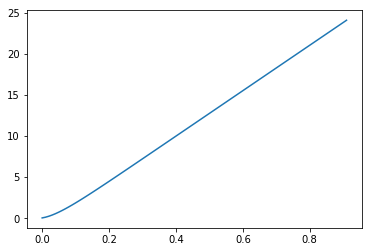

velocity


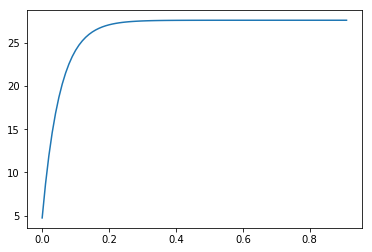

27.604126629530718
accel


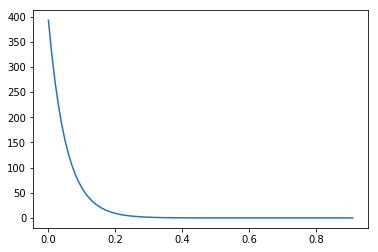

current


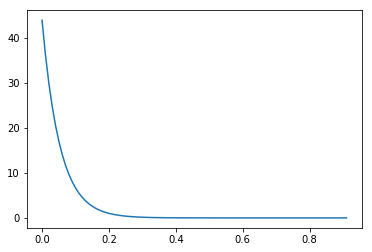

In [3]:
from frc3223_azurite import motors
from frc3223_azurite.conversions import *
from matplotlib import pyplot as plt

neverest = motors.MotorParams(
    name="neverest",
    stall_torque=0.0622,
    stall_current=11.5,
    free_speed=rpm_to_radps(6600))

seat = motors.MotorParams(
name="bosch",
stall_torque=22,
stall_current=12,
free_speed=rpm_to_radps(24))

voltage = 12
wheel_radius = inch_to_meter(1)
mass = lbs_to_kg(155)
ms = motors.MotorSystem(motor=motors.bag, gearing_ratio=50, motor_count=1)



def calc_accel(vel, voltage):
    torque = ms.torque_at_speed_and_voltage(vel, voltage)
    force = torque / wheel_radius
    accel = force / mass
    return accel

def calc_current(vel, voltage): 
    torque = ms.torque_at_speed_and_voltage(vel, voltage)
    return ms.motor_current_at_torque(torque)
    
    
dt = 0.01
t = 0
v = 0
a = calc_accel(v, voltage)
x = 0
i = 0
ts = []
vs = []
xs = []
a_s = []
i_s   = []

while x < inch_to_meter(24) and t < 10:
    v += a * dt
    x += v * dt
    a = calc_accel(v / wheel_radius, voltage)
    i = calc_current(v / wheel_radius, voltage)
    i_s.append(i)
    ts.append(t)
    vs.append(v)
    a_s.append(a)
    xs.append(x)
    t += dt

print("position")
plt.plot(ts, [meter_to_inch(x) for x in xs])
plt.show()
print('velocity')
plt.plot(ts, [meter_to_inch(v) for v in vs])
plt.show()
print(meter_to_inch(vs[-1]))
print("accel")
plt.plot(ts, [meter_to_inch(a) for a in a_s])
plt.show()
print("current")
plt.plot(ts, i_s)
plt.show()

In [2]:
meter_to_inch(motors.bag.free_speed / 100 * wheel_radius)

10.351547793578364

In [3]:
meter_to_inch(motors.bag.free_speed / 100 * wheel_radius)

13.802063724771154

In [4]:
 meter_to_inch(ms.torque_at_speed_and_voltage(0, voltage) / wheel_radius / mass)

189.59473545049389

In [5]:
motors.bag.free_speed / 100

13.802063724771156

In [6]:
wheel_radius

0.0254

In [7]:
ms.torque_at_speed_and_voltage(motors.bag.free_speed / 100, 12)

10.32

In [27]:
14 / 1.5

9.333333333333334

In [13]:
130 * 4

520

In [16]:
170 * 1.36

231.20000000000002

In [17]:
110 * 1.36


149.60000000000002